# Rooftop Solar Potential Optimization for Sustainable Energy in Nairobi

### Import Relevant Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Load the Dataset

In [4]:
# Load the dataset
data = pd.read_csv('nairobi_rooftop_solar_potential.csv')


C:\Users\hp\AppData\Local\Temp\ipykernel_10524\1931403031.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('nairobi_rooftop_solar_potential.csv')


In [5]:
# Preview Dataset
data.head()

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,87100c54-0648-4e73-97f0-3a346c068231,Nairobi,204.53,77.27,14.99,21720.76,single family residential,14.11,9.09,1449.00,NaN,NaN
1,b79fedd1-7c84-4b3f-8fd4-941f3ee17b02,Nairobi,1113.35,676.13,131.17,182191.10,single family residential,21.81,5.57,1388.98,NaN,NaN
2,50ece267-f41a-4bb7-8874-3bf61a9d4aec,Nairobi,577.24,412.30,79.99,115637.95,single family residential,16.34,5.78,1445.72,NaN,NaN
3,df402f1c-5120-4a2f-bb8f-c72c89666c6f,Nairobi,28.58,14.17,2.75,3723.02,single family residential,23.71,4.04,1354.60,NaN,NaN
4,c4d03ac6-80ed-4aa5-95c3-a730c1bf8e68,Nairobi,19.03,6.19,1.20,1655.39,single family residential,22.91,5.31,1378.00,NaN,NaN


### Handling missing values

In [6]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 uuid                               0
City                               0
Surface_area                       0
Potential_installable_area         0
Peak_installable_capacity          0
Energy_potential_per_year          0
Assumed_building_type              0
Estimated_tilt                     0
Estimated_building_height         30
Estimated_capacity_factor       3502
Unit_installation_price       272751
Comment                       272749
dtype: int64


In [7]:
# Check for missing values after handling
missing_values_after_handling = data.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after_handling)


Missing Values After Handling:
 uuid                               0
City                               0
Surface_area                       0
Potential_installable_area         0
Peak_installable_capacity          0
Energy_potential_per_year          0
Assumed_building_type              0
Estimated_tilt                     0
Estimated_building_height         30
Estimated_capacity_factor       3502
Unit_installation_price       272751
Comment                       272749
dtype: int64


### Converting data types

In [8]:
# Check data types of columns
data_types = data.dtypes
print("Data Types:\n", data_types)


Data Types:
 uuid                           object
City                           object
Surface_area                  float64
Potential_installable_area    float64
Peak_installable_capacity     float64
Energy_potential_per_year     float64
Assumed_building_type          object
Estimated_tilt                float64
Estimated_building_height     float64
Estimated_capacity_factor     float64
Unit_installation_price       float64
Comment                        object
dtype: object


In [9]:
# Converting data types
data['Estimated_tilt'] = pd.to_numeric(data['Estimated_tilt'])
data['Estimated_building_height'] = pd.to_numeric(data['Estimated_building_height'])
data['Estimated_capacity_factor'] = pd.to_numeric(data['Estimated_capacity_factor'])


## EDA

 Let's explore potential insights from the rooftop solar potential dataset through Exploratory Data Analysis (EDA)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


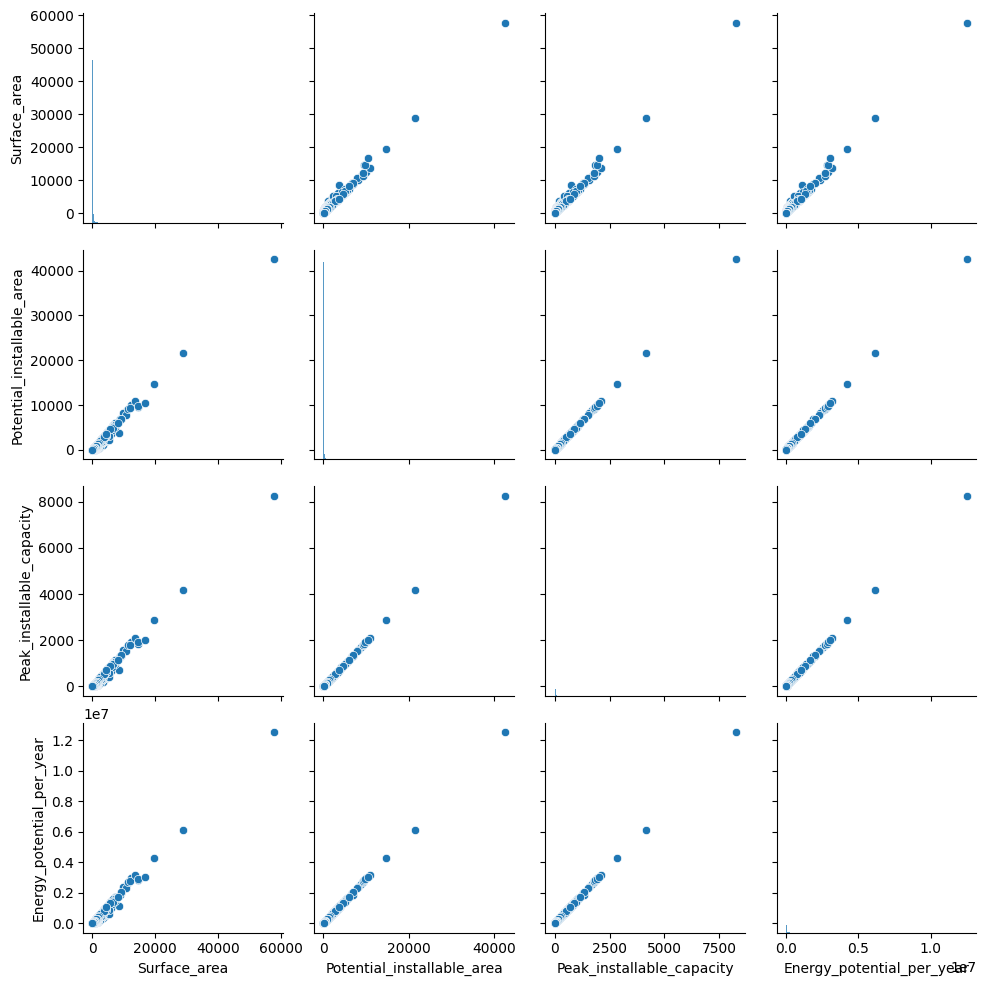

In [10]:
# Pairplot for numerical features
sns.pairplot(data[['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year']])
plt.show()

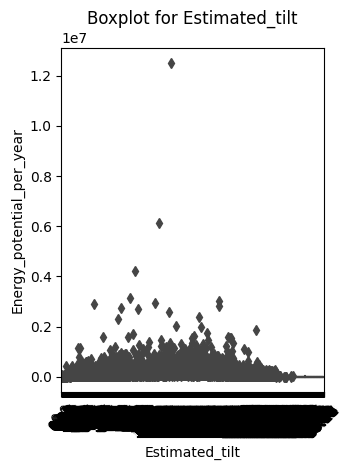

In [11]:
# Boxplot for 'Estimated_tilt'
plt.subplot(1, 2, 2)
sns.boxplot(x='Estimated_tilt', y='Energy_potential_per_year', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot for Estimated_tilt')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot for Assumed_building_type')

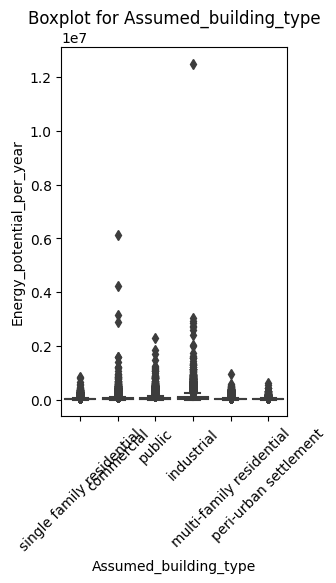

In [12]:
# Boxplot for 'Assumed_building_type'
plt.subplot(1, 2, 1)
sns.boxplot(x='Assumed_building_type', y='Energy_potential_per_year', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot for Assumed_building_type')

In [13]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

ValueError: could not convert string to float: '87100c54-0648-4e73-97f0-3a346c068231'

<Figure size 1000x800 with 0 Axes>

In [14]:
# Assuming you have loaded the preprocessed dataset
X = data[['Surface_area', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']]
y = data[['Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year']]

# One-hot encoding for 'Assumed_building_type'
X_encoded = pd.get_dummies(X, columns=['Assumed_building_type'])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Predict on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model (you can use appropriate metrics for each target variable)
mse = mean_squared_error(y_valid, y_pred)
print(f'Mean Squared Error: {mse}')